# Configuration

### Sources
- https://gitlab.eurecom.fr/oai/openairinterface5g/-/blob/develop/ci-scripts/yaml_files/5g_rfsimulator/docker-compose.yaml
- https://jenkins-oai.eurecom.fr/job/RAN-RF-Sim-Test-5G/

### Config MCC/MNC

Here you can see the effect of the configuration:
```
mcc = 1;  # CHANGED DEFAULT `208`
mnc = 1;  # CHANGED DEFAULT `99`
mnc_length = 3;  # CHANGED DEFAULT `2`
```

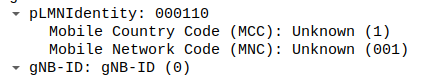

### Config gNB_ID

Here you can see the effect of the configuration:
```
gNB_ID = 0xe00;
```
Note that hex(0xe00) == dec(3584)

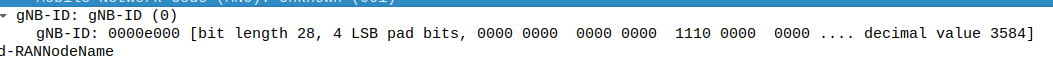

### Config gNB_name

Here you can see the effect of the configuration:
```
gNB_name  =  "gnb-rfsim";
```

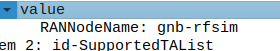

### Error MCC/MNC

Found the error when misconfiguring the PLMN MCC/MNC

#### In docker compose  
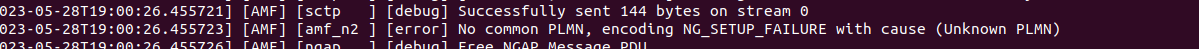

#### In wireshark   
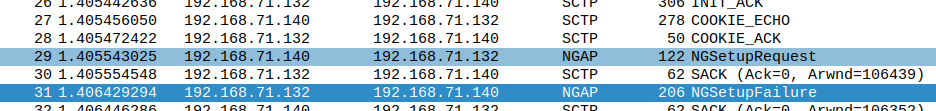

#### The steps I used for debugging.

```bash
mkdir tmp
cd tmp
git clone --branch v1.5.0 https://gitlab.eurecom.fr/oai/cn5g/oai-cn5g-amf
cd oai-cn5g-amf
# replace --build-type Release with --build-type Debug in docker/Dockerfile.amf.ubuntu
# however, it is not that easy, there are some problems with ubuntu packagaes
docker build -f docker/Dockerfile.amf.ubuntu --tag my-oai/oai-amf:v1.5.0 .
docker images
```

```bash
$ docker compose up -d mysql oai-nrf oai-amf oai-smf oai-spgwu oai-ext-dn
$ docker compose ps -a
```

```bash
$ echo 0 | sudo tee /proc/sys/kernel/yama/ptrace_scope
$ docker exec -it rfsim5g-oai-amf bash
(amf) apt-get update && apt-get install -y gdb
(amf) gdb -p 1
(gdb) break amf_n2::get_common_plmn
(gdb) continue
```

```bash
$ docker compose up -d oai-gnb
```

```bash
(gdb) next
(gdb) print list
(gdb) print amf_cfg.plmn_list
```

### Solved

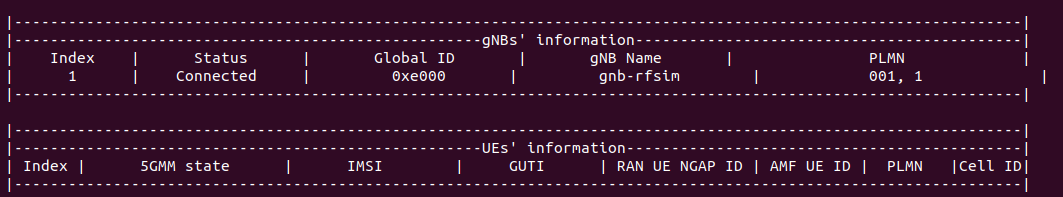

Got the MCC/MNC configuration to work (see PLMN in the image above)

#### In wireshark

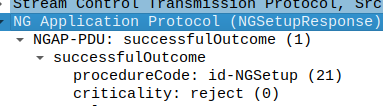   
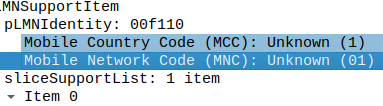

### Communcication after adding the UE

#### Got a Registration reject (Illegal UE)
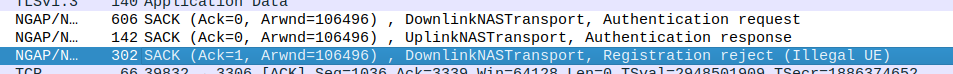  
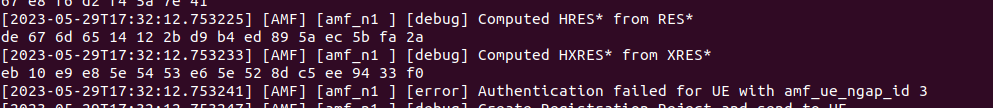  
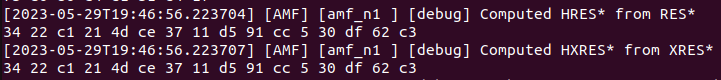

commands used:
```
sudo tshark -i rfsim5g-public -f "sctp or port 80 or port 8805 or icmp or port 3306" -w /tmp/test.pcap
sudo wireshark /tmp/test.pcap
```